# MNIST Data Set

The MNIST data set is a simple computer vision dataset, consisting of 28x28 pixel images of handwritten digits It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

## Reading in the Data sets

To read in the MNIST data, we have to open the .gz files that they come in. To do this, we just import the gzip python library. 

### Reading in the images file

In [2]:
# Adapted from: https://docs.python.org/2/library/gzip.html
import gzip

# This opens the images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    image_content = f.read()

In [8]:
# Check the type of the data read in
type(image_content)

bytes

In [11]:
# Check the values of the content between an index of 0 and 8
image_content[0:8]

b"\x00\x00\x08\x03\x00\x00'\x10"

### Reading in the labels file

In [5]:
# Adapted from: https://docs.python.org/2/library/gzip.html
import gzip

# This opens the labels file which is located in our local directory and assigns the read in value to a variable
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content = f.read()

In [37]:
# Check the type of the data read in
type(image_content)

bytes

In [38]:
# Check the values of the content between an index of 0 and 8
image_content[0:8]

b"\x00\x00\x08\x03\x00\x00'\x10"

## Converting the bytes into int, and what they mean

To convert the data from bytes to int, we use the int.from_bytes classmethod which is a buildin in python.

The two arguments we'll be using are the bytes and the byteorder.

The bytes argument must be either a byte-like object, an iterable producing bytes or hardcoded bytes.

The byteorder argument determines the byte order used to represent the integer. If byteorder is "big", the most significant byte is at the beginning of the byte array. If byteorder is "little", the most significant byte is at the end of the byte array. 

In [3]:
# Documentation from https://docs.python.org/3/library/stdtypes.html#int.from_bytes
# In the MNIST data set, the first 4 bytes, the "Magic Number", are used to determine whether the dataset is for the images or labels

# Below we are converting the first 4 bytes from the image dataset, therefore the expected output should be 2051
int.from_bytes(image_content[0:4], byteorder='big')

2051

In [6]:
# Whereas here, we are converting the first 4 bytes from the label dataset, which should output 2049
int.from_bytes(label_content[0:4], byteorder='big')

2049

In [9]:
# The next 4 bytes after this in the dataset determine the number of items in the dataset.
# Currently we have imported the test set, which should contain 10,000 items in both the image file and label file.
int.from_bytes(image_content[4:8], byteorder='big')

10000

In [8]:
int.from_bytes(label_content[4:8], byteorder='big')

10000

In [11]:
# Now if we import the training set, we should have a different number of items in those two sets
import gzip

# This opens the training images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    train_image_content = f.read()
    
# This opens the training labels file which is located in our local directory and assigns the read in value to a variable
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    train_label_content = f.read()
    
int.from_bytes(train_image_content[4:8], byteorder='big')

60000

In [12]:
int.from_bytes(train_label_content[4:8], byteorder='big')

60000

## Plotting the image

To plot the images from the image dataset, we need to read them from the byte array. 
Each image in the 

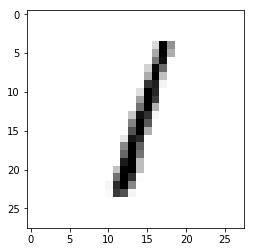

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Reads the pixel values as intergers
parsed_img_array = np.frombuffer(image_content, dtype = np.uint8, offset = 16)
# Stores these values into an array
# Since we are using the test set of images, the size of the array will be 10,000
parsed_img_array = parsed_img_array.reshape(10000, 28, 28)

# Old method
#image = ~np.array(list(image_content[16:800])).reshape(28,28).astype(np.uint8)

plt.imshow(parsed_img_array[2], cmap="binary")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

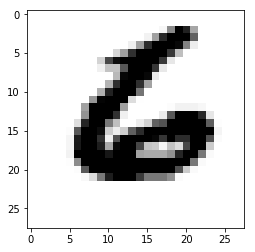

In [33]:
plt.imshow(parsed_img_array[9999], cmap="binary")

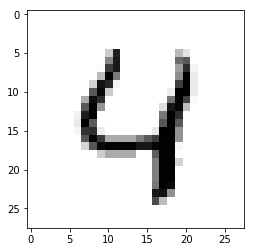

In [6]:
# A loop to save all of the individual numbers into a their own png file
# NOTE: I used a range of 5 as if I were to use the length of the array it would save 10,000 files in this directory, which may bring harm
# to your device
for x in range(5):
    plt.imshow(parsed_img_array[x], cmap="binary")
    plt.savefig('t10k-images-id' + str(x) + '-ubyte')